# FCM training based on Hopfield NN

## Learning algorithms for Fuzzy Cognitive Maps

This notebook is an implementation of the Hopfield Neural Network training algorithm as proposed in section 4.2 of [reference paper](https://www.researchgate.net/publication/221399332_Learning_algorithms_for_fuzzy_cognitive_maps).


## Dependencies

[NetworkX](http://networkx.github.io) is a Python library for modeling complex networks. [Matplotlib](http://matplotlib.org) is for ploting. [Sympy](http://sympy.org) prints nice LaTeX from arrays. This is a [jupyter notebook](http://jupyter.org/), hosted at https://github.com/CA-Lab/FCM_Niche_Construction/blob/master/hopfield.ipynb.

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from nx_plot import draw_graph
import sympy
sympy.init_printing()
from sympy.matrices import Matrix
import random

## Example

In [2]:
c = [0.32, 0.4, 0.45]

Matrix([c, ])

[0.32  0.4  0.45]

In [3]:
w = np.array([[0,  1, -1],
              [1,  0,  1],
              [-1, 1,  0]])
Matrix(w)

⎡0   1  -1⎤
⎢         ⎥
⎢1   0  1 ⎥
⎢         ⎥
⎣-1  1  0 ⎦

## Load to NetworkX

  (0, 1)	1
  (0, 2)	-1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	-1
  (2, 1)	1


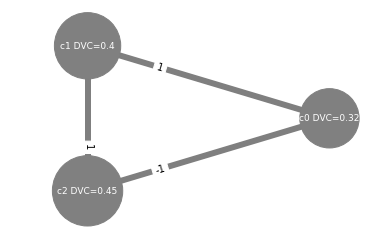

In [4]:
# create directed graph from adjacency matrix w
g = nx.Graph(w.swapaxes(0, 1))  

# set node states
for n in g.nodes:
    g.add_node(n, dvc=c[n])

    
# sanity check
print nx.adjacency_matrix(g)

draw_graph(g)

## Time Step procedure

At each time step the simulation must run procedures for updating node states and edge weights.

### Activation Function

$$ f(x)=\frac{1}{1+e^{-x}} $$


In [5]:
def f(x):
    """ activation function """
    return 1.0 / (1 + np.e ** (-x))

### Desired Value of Concept

$$ DVC_{i}(t+1)=f\{DVC_{i}(T)+\sum_{j}w_{ij}(t+1)\cdot DVC_{j}(t)\} $$

In [6]:
def DVC(i, g):
    """ Desired Value of Concept on t+1 """
    return f(g.node[i]['dvc']
              + sum([w((i, j), g)* g.node[j]['dvc']
                     for j in g.neighbors(i)]))

### Edge weight update

$$ w_{ij}(t+1)=w_{ij}(t)+(2DVC_{i}(t)-1)\cdot(2DVC_{j}(t)-1) $$

In [7]:
def w(edge, g):
    """ weight for edge on t+1 """
    return g.get_edge_data(*edge)['weight'] \
            + \
            (2 * g.node[edge[0]]['dvc'] - 1) * (2 * g.node[edge[1]]['dvc'] - 1)


[(0, {'dvc': 0.32}), (1, {'dvc': 0.4}), (2, {'dvc': 0.45})]
[(0, {'dvc': 0.5890404340586651}), (1, {'dvc': 0.7745318718229726}), (2, {'dvc': 0.6385416306633552})]
[(0, {'dvc': 0.7346342792788328}), (1, {'dvc': 0.9142585150069948}), (2, {'dvc': 0.7603370778163697})]
[(0, {'dvc': 0.8994513672433864}), (1, {'dvc': 0.9800051476591496}), (2, {'dvc': 0.9095233572855014})]
[(0, {'dvc': 0.9891287437931854}), (1, {'dvc': 0.9987080258092433}), (2, {'dvc': 0.9900116620312441})]


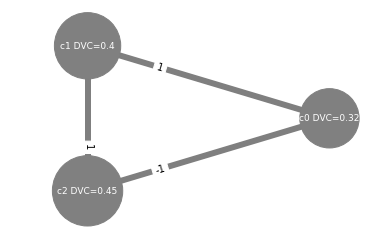

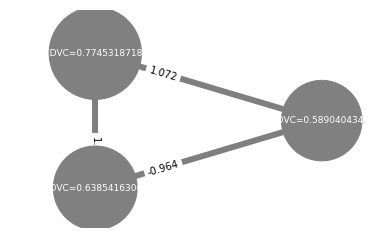

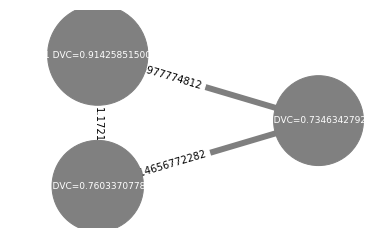

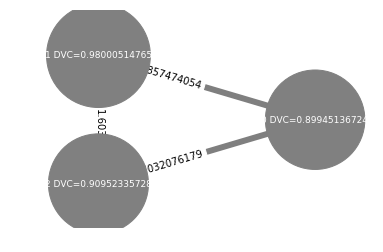

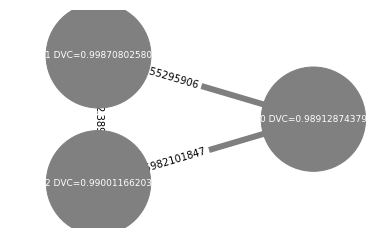

In [8]:
def update_states(g):
    h = g.copy()
    for n in g.nodes:
        h.node[n]['dvc'] = DVC(n, g)
    return h

def update_weights(g):
    h = g.copy()
    for e in g.edges:
        h.add_edge(*e, weight=w(e, g))

    return h

for n in range(5):
    print g.nodes.data()
    draw_graph(g)
    h = update_weights(g)
    g = update_states(h)


In [9]:
DVC(0, g)

In [10]:
random.choice(list(g.nodes))